In [3]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='YlOrRd'):
      
    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(20,10),)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout();



In [5]:
#importing dataset
data="E:\snu\SEM 6\APPLIED ML\PROJECT\EED363_1710110400_YATHARTH\Data\clean_data.csv"
clean_data=pd.read_csv(data)
clean_data = clean_data.drop(['Unnamed','Unnamed: 0','Unnamed: 0.1'], axis=1)
X=clean_data.iloc[:,5:11]
Y=clean_data.iloc[:,0]
activities=["climbingdown","climbingup","jumping","lying","running","sitting","standing","walking"]


In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [7]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [8]:
#fitting logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#predicting training set results and thus finding accuracy
y_pred_train=classifier.predict(X_train)

<Figure size 432x288 with 0 Axes>

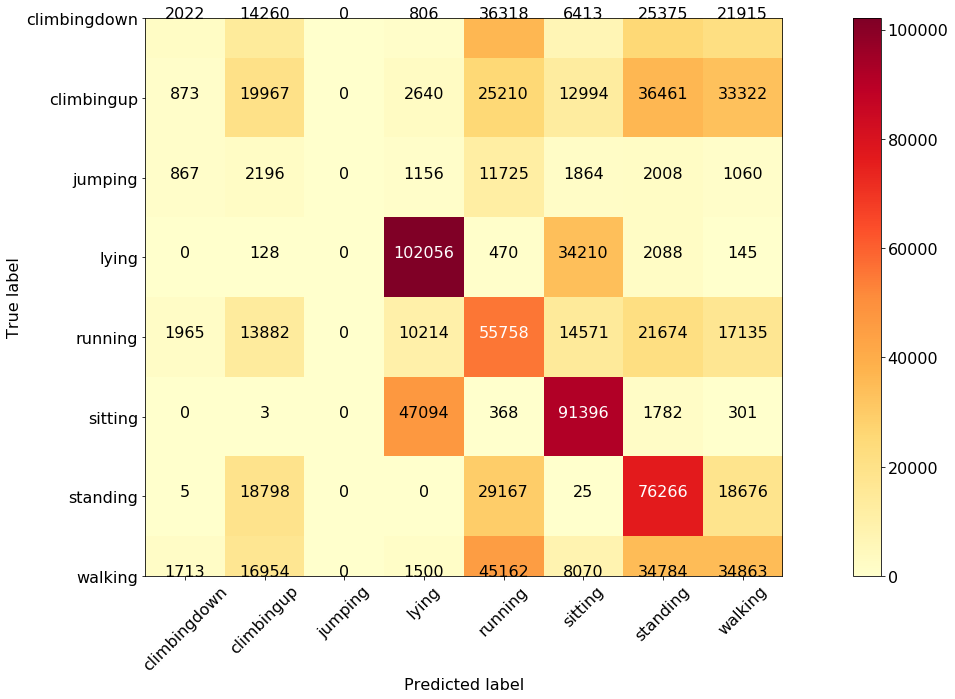

In [10]:
#Making confusion matrix
cm_train=confusion_matrix(Y_train,y_pred_train)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm_train, 
                      classes=activities,
                      title='');

In [11]:
correct_train=0
for i in range (0,8):
    correct_train=correct_train+cm_train[i,i]
accuracy_train=(correct_train/Y_train.size)*100
print('TRAINING ACCURACY IS ',accuracy_train)

TRAINING ACCURACY IS  39.797850469721816


In [12]:
#predicting test set results and thus finding accuracy
y_pred_test=classifier.predict(X_test) 

<Figure size 432x288 with 0 Axes>

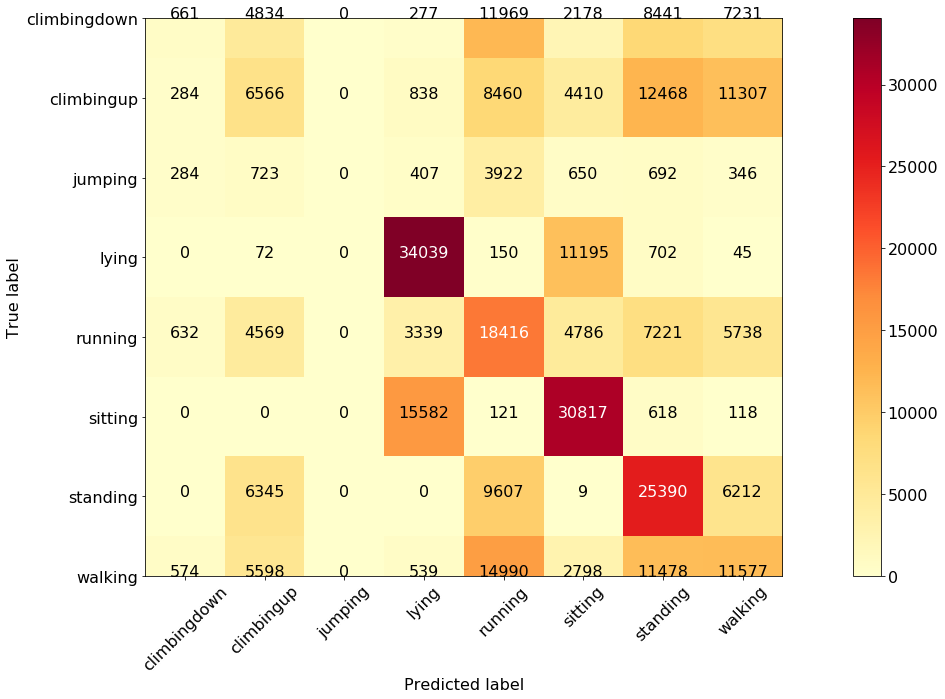

In [13]:
#Making Confusion Matrix
cm_test=confusion_matrix(Y_test,y_pred_test)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm_test, 
                      classes=activities,
                      title='');

In [14]:
correct_test=0
for i in range (0,8):
    correct_test=correct_test+cm_test[i,i]
accuracy_test=(correct_test/Y_test.size)*100
print('TEST ACCURACY IS ',accuracy_test)

TEST ACCURACY IS  39.80513701303771
